In [33]:
# brew install graphviz
# pip install graphviz
from graphviz import Digraph

In [34]:
from Engine.engine import Scalar

In [35]:
def trace(root):
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._ancestors:
                edges.add((child, v))
                build(child)

    build(root)
    return nodes, edges


def draw_dot(root, format='svg', rankdir='LR'):
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir})  #, node_attr={'rankdir': 'TB'})

    for n in nodes:
        dot.node(name=str(id(n)), label="{ data %.4f | grad %.4f }" % (n.value, n.gradient), shape='record')
        if n._operations:
            dot.node(name=str(id(n)) + n._operations, label=n._operations)
            dot.edge(str(id(n)) + n._operations, str(id(n)))

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._operations)

    return dot

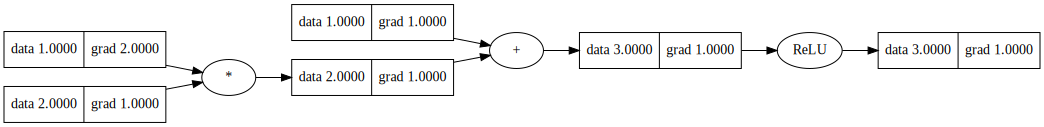

In [36]:
# a very simple example
x = Scalar(1.0)
y = (x * 2 + 1).relu()
y.backpropagate()
draw_dot(y)

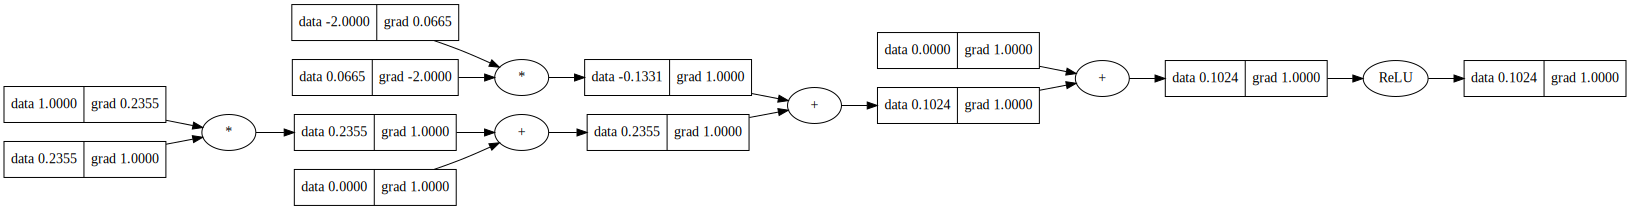

In [37]:
# a simple 2D neuron
import random
from Engine.Neural_Networks import Neuron

random.seed(1337)
n = Neuron(2)
x = [Scalar(1.0), Scalar(-2.0)]
y = n(x)
y.backpropagate()

dot = draw_dot(y)
dot

In [38]:
dot.render('gout')

'gout.svg'